## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_data.csv')

In [3]:
df.head()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,NaN,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80572 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Make             80572 non-null  object
 1   Model            80572 non-null  object
 2   Version          73800 non-null  object
 3   Price            80572 non-null  object
 4   Make_Year        80572 non-null  int64 
 5   CC               80572 non-null  int64 
 6   Assembly         80572 non-null  object
 7   Mileage          80572 non-null  int64 
 8   Registered City  80572 non-null  object
 9   Transmission     80572 non-null  object
dtypes: int64(3), object(7)
memory usage: 6.1+ MB


## Data cleaning 
### Filling missing values
We can see that version has some missing values let us explore the data and see if we can fill the missing values

In [5]:
df['Version'].value_counts()

Version
GLi 1.3 VVTi               3319
VXR                        3065
VX Euro II                 1999
VX                         1916
Oriel 1.8 i-VTEC CVT       1893
                           ... 
MX                            1
M Class ML 350                1
Wagon ECO-X                   1
Freelander 2 3.2 i6 HSE       1
Wagon 20S                     1
Name: count, Length: 1339, dtype: int64

Looking at the above Versions we can tell a car's version is specific to its model and make. Since versions is a categorical variable we have two options to fill the missing values
- Fill the missing values with the mode of the column
- Fill the missing values with a new category

But since there is a lot of variations in the data we can not just fill the missing values with the mode of the column. Moreover, version of a car is specific to its model and make. So let us fill the missing values with a new category called "missing", Then we can carry out data analysis and see if we can fill the missing values with a more specific category.

In [6]:
# we will fill the missing values with a new category
df['Version'].fillna('missing', inplace=True)

### Correcting data types

In [7]:
# since we want to predict the price of the car, we will drop the rows with missing price
df['Price'] = df['Price'].replace('Call for price', np.nan)
df.dropna(subset=['Price'], inplace=True)
df['Price'] = df['Price'].astype(float)
df['Make_Year'] = df['Make_Year'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79363 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             79363 non-null  object 
 1   Model            79363 non-null  object 
 2   Version          79363 non-null  object 
 3   Price            79363 non-null  float64
 4   Make_Year        79363 non-null  int32  
 5   CC               79363 non-null  int64  
 6   Assembly         79363 non-null  object 
 7   Mileage          79363 non-null  int64  
 8   Registered City  79363 non-null  object 
 9   Transmission     79363 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 6.4+ MB


## Data Analysis
Next we move towards taking a deeper look at our data and try to find some insights from it. We will explore the price column and its relationship with other attributes in our dataset
### Price

<Axes: xlabel='Price', ylabel='Count'>

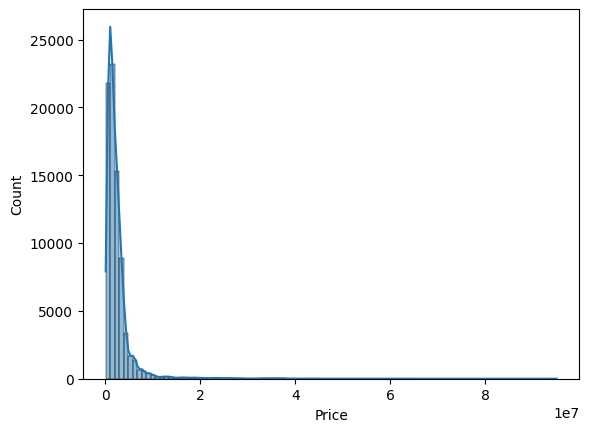

In [9]:
sns.histplot(df['Price'], bins = 100, kde = True)

we see that there is a lot of variation in the price of cars. We can observe that most values of price are between 0 and 1.5 million. There are some outliers in the data which we can call as luxury cars. Let us now investigate the features of these luxury cars. Let us investigate the price column further and see if we can find some insights from it

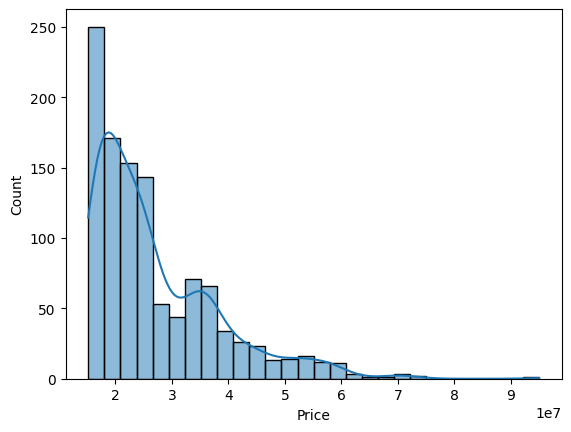

In [10]:
expensive_cars = df[df['Price'] > 1.5e7]
sns.histplot(expensive_cars['Price'], kde = True)
plt.show()

<Axes: xlabel='CC', ylabel='Count'>

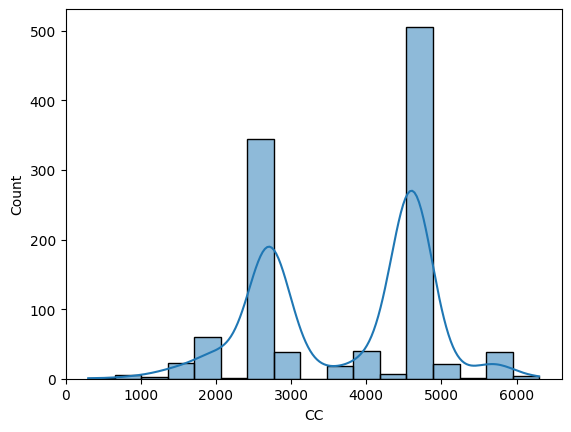

In [11]:
# plot cc of expensive cars
sns.histplot(expensive_cars['CC'], kde = True)

We would expect that the CC of an expensive car would be higher than that of a cheaper car. Let us investigate the expensive cars that have lower values than 1500

In [12]:
expensive_cars[expensive_cars['CC'] < 1500]

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
4998,Audi,e-tron,50 Quattro 230 kW,15800000.0,2020,300,Imported,7500,Un-Registered,Automatic
6972,Tesla,Model,S,30000000.0,2018,1000,Imported,42000,Un-Registered,Automatic
7456,Porsche,Taycan,Turbo S,42500000.0,2020,800,Local,500,Un-Registered,Automatic
11166,Porsche,Taycan,missing,38500000.0,2021,1000,Imported,1,Un-Registered,Automatic
29405,Audi,e-tron,50 Quattro 230 kW,16600000.0,2020,1000,Imported,11000,Un-Registered,Automatic
38084,Audi,A5,missing,15800000.0,2020,1400,Imported,465,Karachi,Automatic
39319,Audi,e-tron,50 Quattro 230 kW,16200000.0,2020,1200,Imported,6500,Islamabad,Automatic
45661,Audi,A5,S-Line Competition,15800000.0,2020,1400,Imported,800,Karachi,Automatic
64634,Audi,e-tron,50 Quattro 230 kW,15600000.0,2020,1000,Imported,6500,Islamabad,Automatic
79769,Tesla,Model,3,15500000.0,2019,1100,Imported,24000,Un-Registered,Automatic


We see Audi e-tron has a lot of variations in the CC values. Some of the values are
- 300
- 1000
- 1200

We would expect if the version of a car is same then it should have close values of CC. Outliers here might suggest that the data is incorrect. Let us check the CC of all Audi e-tron cars and see if we can find any insights from it

In [13]:
expensive_cars[expensive_cars['Model'] == 'e-tron']

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
2814,Audi,e-tron,50 Quattro 230 kW,16500000.0,2020,2000,Local,5933,Un-Registered,Automatic
3141,Audi,e-tron,50 Quattro 230 kW,15900000.0,2020,2000,Imported,4172,Un-Registered,Automatic
3522,Audi,e-tron,50 Quattro 230 kW,17300000.0,2021,5000,Imported,11,Un-Registered,Automatic
3976,Audi,e-tron,50 Quattro 230 kW,17200000.0,2020,1500,Local,10,Un-Registered,Automatic
4020,Audi,e-tron,50 Quattro 230 kW,18500000.0,2021,3000,Imported,300,Un-Registered,Automatic
4998,Audi,e-tron,50 Quattro 230 kW,15800000.0,2020,300,Imported,7500,Un-Registered,Automatic
9591,Audi,e-tron,50 Quattro 230 kW,15200000.0,2020,3000,Local,17000,Un-Registered,Automatic
23612,Audi,e-tron,50 Quattro 230 kW,16300000.0,2020,1800,Local,1100,Un-Registered,Automatic
24599,Audi,e-tron,50 Quattro 230 kW,16300000.0,2021,5000,Local,400,Islamabad,Automatic
29405,Audi,e-tron,50 Quattro 230 kW,16600000.0,2020,1000,Imported,11000,Un-Registered,Automatic


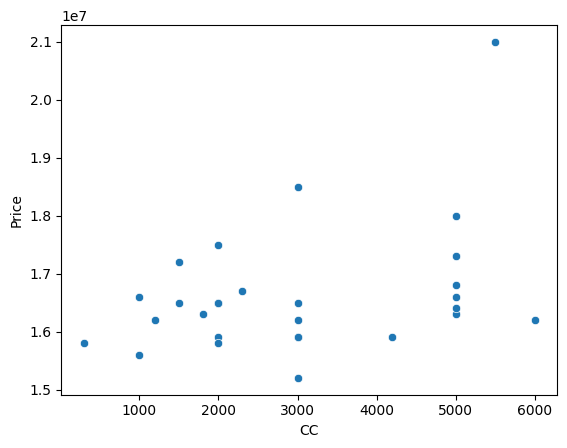

In [14]:
sns.scatterplot(data = expensive_cars[expensive_cars['Model'] == 'e-tron'], x = 'CC', y = 'Price')
plt.show()

Here we see that CC of Audi e-tron has many values but the price of the car is not affected. We will use mean of a Model version to fill the missing values of CC. Moreover, we see that Audi e-tron has only 1 version which is 50 quattro. We can fill the missing values of version with mode.

In [15]:
# undo setting the missing values to a new category
expensive_cars["Version"] = expensive_cars["Version"].replace("missing", np.nan)
# fill missing values with the mode of the group
grouped_modes = expensive_cars.groupby('Model')['Version'].apply(lambda x: x.mode().iat[0] if not x.mode().empty else None) 
expensive_cars['Version'] = expensive_cars['Version'].fillna(expensive_cars['Model'].map(grouped_modes))
# fill the remaining missing values with a new category
expensive_cars['Version'] = expensive_cars['Version'].fillna('missing')

# Calculate the mean CC for each Version
version_mean_cc = expensive_cars.groupby('Version')['CC'].mean()
# Map the mean CC to the Version
expensive_cars['CC'] = expensive_cars['Version'].map(version_mean_cc)

C:\Users\muham\AppData\Local\Temp\ipykernel_3368\1609031813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expensive_cars["Version"] = expensive_cars["Version"].replace("missing", np.nan)
C:\Users\muham\AppData\Local\Temp\ipykernel_3368\1609031813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expensive_cars['Version'] = expensive_cars['Version'].fillna(expensive_cars['Model'].map(grouped_modes))
C:\Users\muham\AppData\Local\Temp\ipykernel_3368\1609031813.py:7: SettingWithCopyWarning: 
A value is 

In [16]:
expensive_cars[expensive_cars['Model'] == 'e-tron']

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
2814,Audi,e-tron,50 Quattro 230 kW,16500000.0,2020,3010.714286,Local,5933,Un-Registered,Automatic
3141,Audi,e-tron,50 Quattro 230 kW,15900000.0,2020,3010.714286,Imported,4172,Un-Registered,Automatic
3522,Audi,e-tron,50 Quattro 230 kW,17300000.0,2021,3010.714286,Imported,11,Un-Registered,Automatic
3976,Audi,e-tron,50 Quattro 230 kW,17200000.0,2020,3010.714286,Local,10,Un-Registered,Automatic
4020,Audi,e-tron,50 Quattro 230 kW,18500000.0,2021,3010.714286,Imported,300,Un-Registered,Automatic
4998,Audi,e-tron,50 Quattro 230 kW,15800000.0,2020,3010.714286,Imported,7500,Un-Registered,Automatic
9591,Audi,e-tron,50 Quattro 230 kW,15200000.0,2020,3010.714286,Local,17000,Un-Registered,Automatic
23612,Audi,e-tron,50 Quattro 230 kW,16300000.0,2020,3010.714286,Local,1100,Un-Registered,Automatic
24599,Audi,e-tron,50 Quattro 230 kW,16300000.0,2021,3010.714286,Local,400,Islamabad,Automatic
29405,Audi,e-tron,50 Quattro 230 kW,16600000.0,2020,3010.714286,Imported,11000,Un-Registered,Automatic


### Make of Expensive cars
Let us take a look at the Make of expensive cars

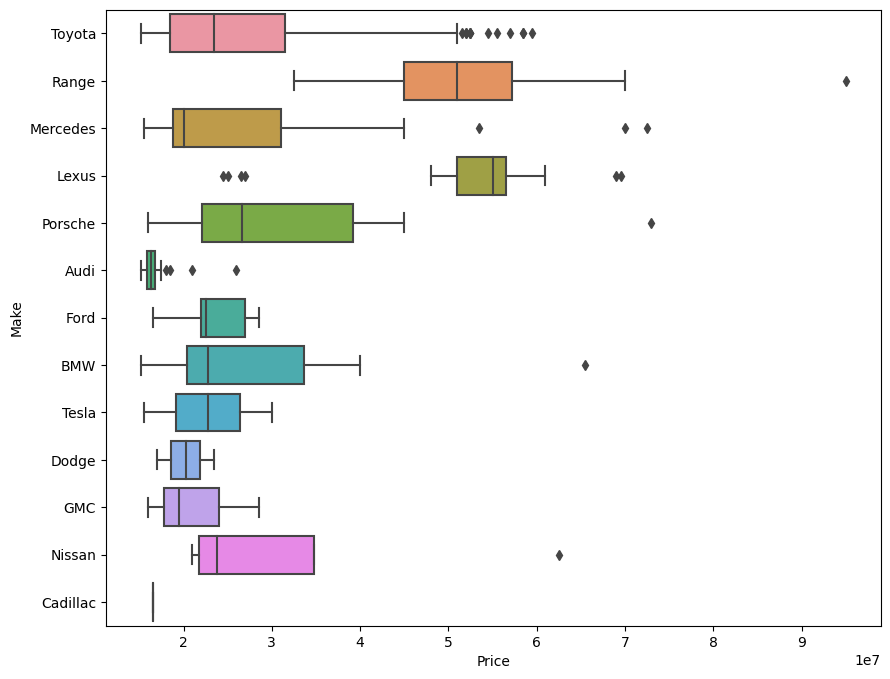

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(y="Make", x="Price", data=expensive_cars)
plt.show()

We observe that the expensive cars are the ones we would expect but for toyota we can see that there are alot of outliers. Let us invesitage further by plotting the Model of expensive cars

### Model of expensive cars

C:\Users\muham\AppData\Local\Temp\ipykernel_3368\1968833686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expensive_cars['Make_Model'] = expensive_cars['Make'] + ' ' + expensive_cars['Model']


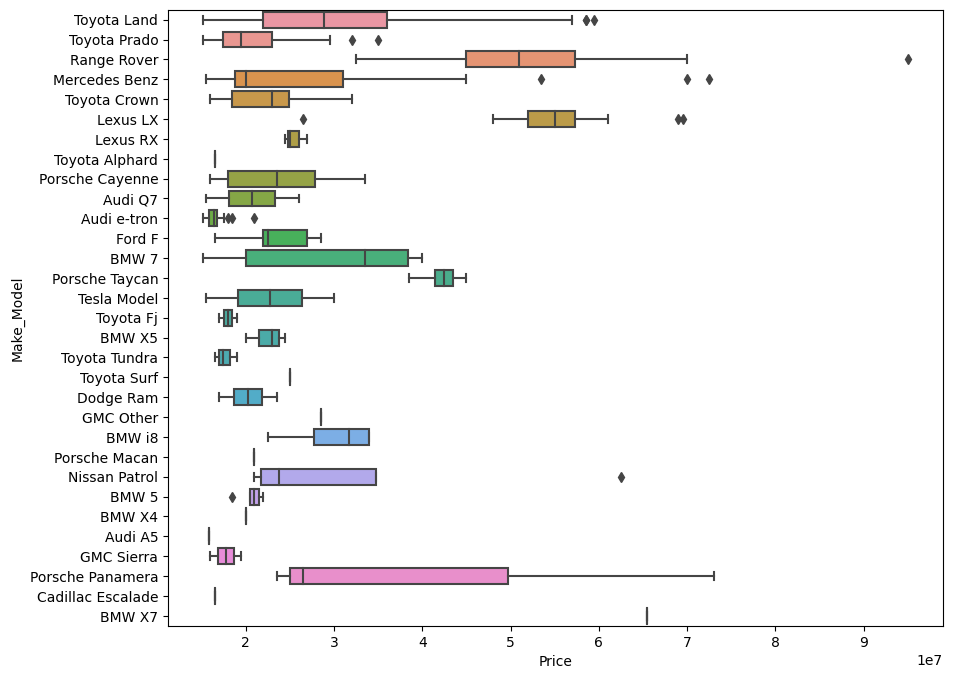

In [18]:
expensive_cars['Make_Model'] = expensive_cars['Make'] + ' ' + expensive_cars['Model']

# Create a boxplot with 'Make_Model' on the y-axis
plt.figure(figsize=(10, 8))
sns.boxplot(y="Make_Model", x="Price", data=expensive_cars)
plt.show()

### Price of most common cars

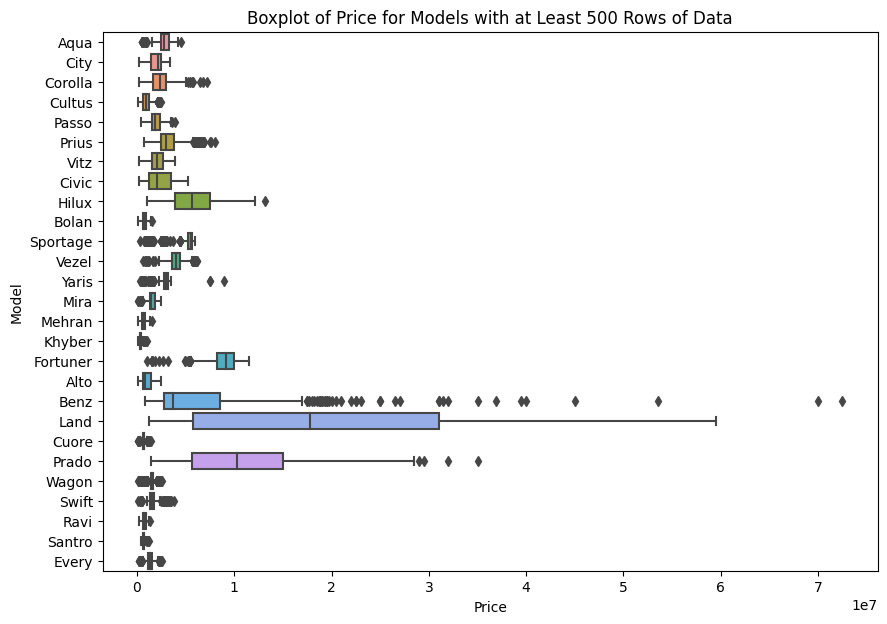

In [19]:
make_counts = df['Model'].value_counts()
models_with_at_least_50_rows = make_counts[make_counts >= 500].index
filtered_df = df[df['Model'].isin(models_with_at_least_50_rows)]

plt.figure(figsize=(10, 7))
sns.boxplot(y='Model', x='Price', data=filtered_df)
plt.title('Boxplot of Price for Models with at Least 500 Rows of Data')
plt.show()


Here we can see that although most cars have relatively less variation in price, there are some cars that have a lot of variation in price such as Mercedes Benz and Toyota Land cruiser.

### Price compared with company
Now let us check the price compared with the company

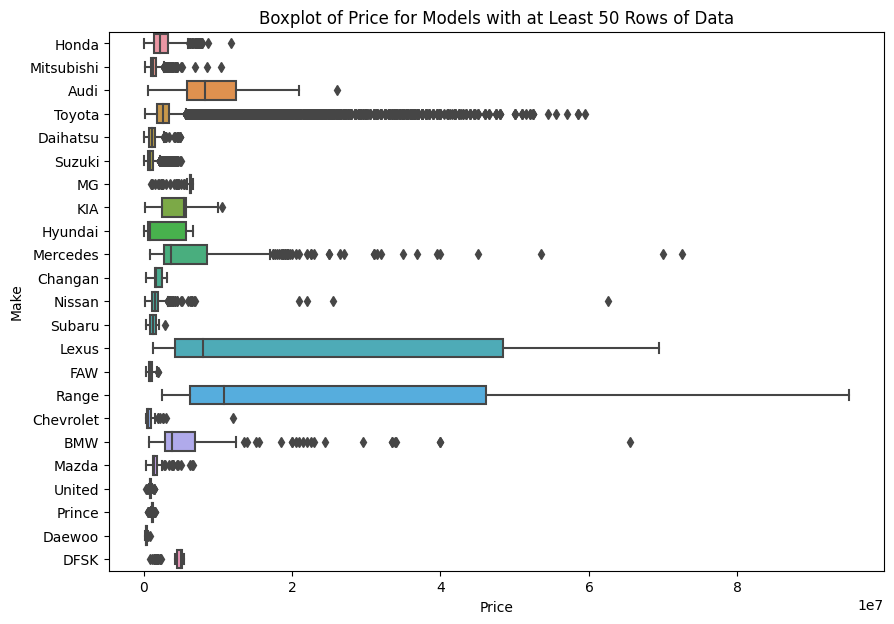

In [20]:
make_counts = df['Make'].value_counts()
models_with_at_least_50_rows = make_counts[make_counts >= 50].index
filtered_df = df[df['Make'].isin(models_with_at_least_50_rows)]

# Create a boxplot for models with at least 50 rows of data
plt.figure(figsize=(10, 7))
sns.boxplot(y='Make', x='Price', data=filtered_df)
plt.title('Boxplot of Price for Models with at Least 50 Rows of Data')
plt.show()

We observe that Lexus and Ranger rover are generally more expensive while toyota has alot of outliers. This is becuase toyota has alot of variety when it comes to cars. Some of them are quite cheap while others fall in the pricey region just as we saw above.

---

From All these graphs we can conclude that when it comes to predicting a car's price, the Make and model adds alot of information. Now let us take a look at the remaining columns and see if we can find any insights from them

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79363 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             79363 non-null  object 
 1   Model            79363 non-null  object 
 2   Version          79363 non-null  object 
 3   Price            79363 non-null  float64
 4   Make_Year        79363 non-null  int32  
 5   CC               79363 non-null  int64  
 6   Assembly         79363 non-null  object 
 7   Mileage          79363 non-null  int64  
 8   Registered City  79363 non-null  object 
 9   Transmission     79363 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 6.4+ MB


### Price vs Year

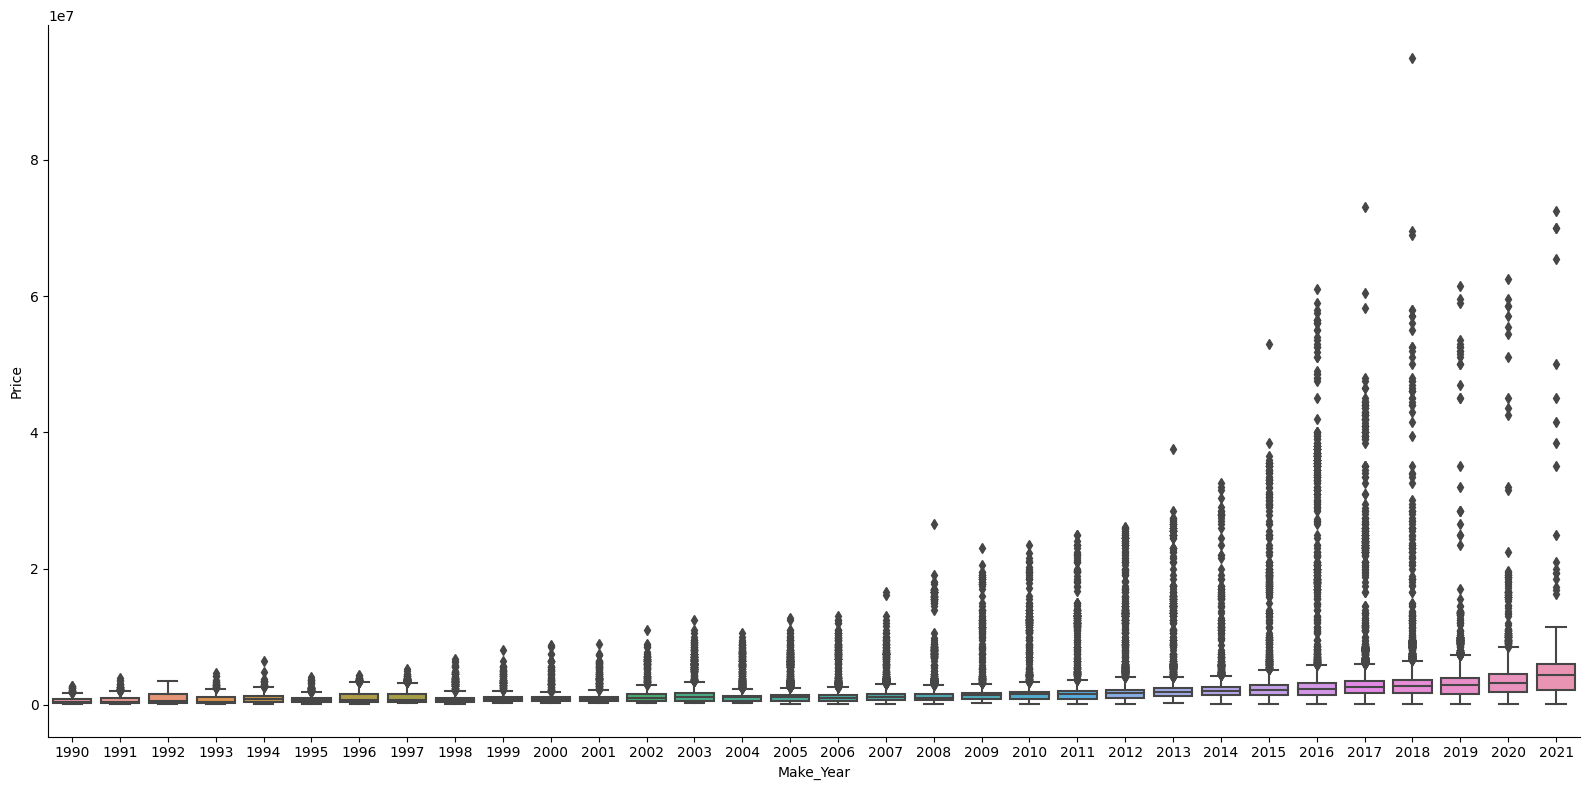

In [22]:
sns.catplot(x='Make_Year', y='Price', data=df, kind='box', height=8, aspect=2)

Here we can see that even though the average price of cars has remained similar of the years. But the upper limit of the price has increased. This suggests that the price of luxury cars has increased over the years.

### Price vs Transmission

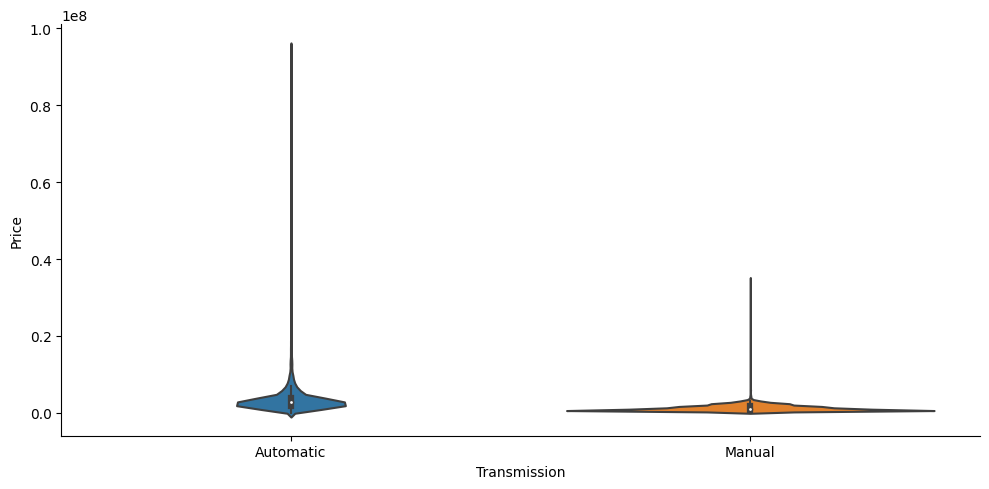

In [23]:
sns.catplot(x='Transmission', y='Price', data=df, kind='violin', height=5, aspect=2)
plt.show()

So the price of cars with automatic transmission is generally higher than that of manual transmission. Moreover, most manual cars have similar prices while automatic cars have a lot of variation in price.

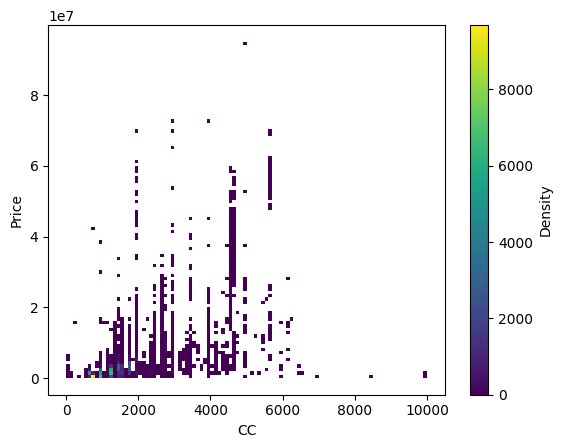

In [24]:
sns.histplot(x='CC', y='Price', data=df, bins=100, kde=True, cbar=True, cbar_kws={'label': 'Density'}, cmap='viridis')
plt.show()

we can observe that the avg price of cars goes on increasing with increase in CC

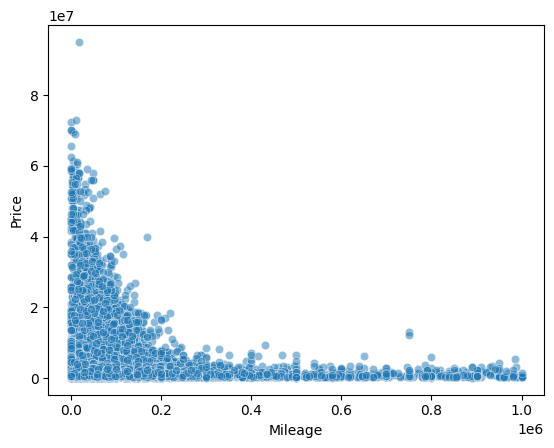

In [25]:
sns.scatterplot(y='Price', x='Mileage', data=df, alpha=0.5)
plt.show()

we can observe that the avg price of cars goes on increasing with increase in KM driven

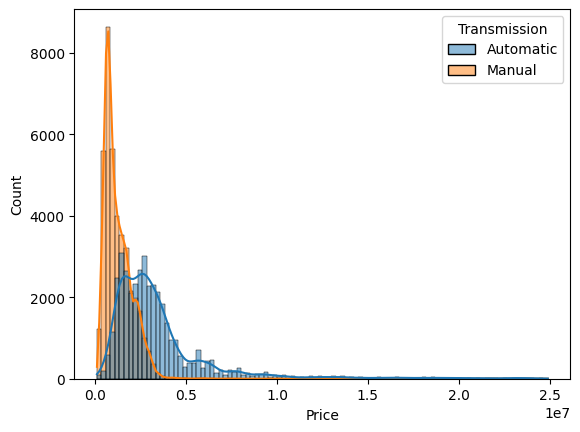

In [40]:
non_expensive_cars = df[df['Price'] < 2.5e7]
sns.histplot(x='Price', hue='Transmission', data=non_expensive_cars, bins=100, kde=True)
plt.show()

we can see that most cars are locally assembled but the average price of imported cars is higher than that of locally assembled cars

### Training the model

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79363 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             79363 non-null  object 
 1   Model            79363 non-null  object 
 2   Version          79363 non-null  object 
 3   Price            79363 non-null  float64
 4   Make_Year        79363 non-null  int32  
 5   CC               79363 non-null  int64  
 6   Assembly         79363 non-null  object 
 7   Mileage          79363 non-null  int64  
 8   Registered City  79363 non-null  object 
 9   Transmission     79363 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 6.4+ MB


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def train_and_evaluate_model(df, model):
    # Separate features and target
    features = df.drop('Price', axis=1)
    target = df['Price']

    # Identify categorical and numerical columns
    categorical_cols = features.select_dtypes(include=['object', 'category']).columns
    numerical_cols = features.select_dtypes(include=['int32', 'int64', 'float64']).columns

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42)
    
    
    # Create the pipeline with the specified model
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model_pipeline.predict(X_test)
    print(f'Results for {model}')
    print('R2 score:', r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

    # Compare the predicted and actual prices
    comparison = pd.DataFrame({'Actual': y_test/100000, 'Predicted': y_pred/100000})
    print(comparison.head())
    
    return model_pipeline


In [43]:
from sklearn.neighbors import KNeighborsRegressor
train_and_evaluate_model(df, KNeighborsRegressor())

Results for KNeighborsRegressor()
R2 score: 0.9432973056963457
MAPE: 0.12600010562342553
       Actual  Predicted
24427    10.8     11.410
71683    24.5     26.260
61853    12.0     11.130
56348    15.5     15.150
5652      4.3      5.086


In [44]:
from sklearn.linear_model import LinearRegression

train_and_evaluate_model(df, LinearRegression())

Results for LinearRegression()
R2 score: 0.8592081119821272
MAPE: 0.2944405609249795
       Actual  Predicted
24427    10.8   6.954344
71683    24.5  25.008719
61853    12.0   8.640319
56348    15.5  15.503468
5652      4.3   5.024169


In [49]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = train_and_evaluate_model(df, RandomForestRegressor())

Results for RandomForestRegressor()
R2 score: 0.9523195006390132
MAPE: 0.11443110438110557
       Actual  Predicted
24427    10.8  11.038500
71683    24.5  25.999500
61853    12.0  11.781000
56348    15.5  15.225167
5652      4.3   4.813667


In [51]:
from joblib import dump

dump(random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']